In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [4]:
oliv = datasets.fetch_olivetti_faces()

In [6]:
oliv.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [28]:
oliv['data'].shape

(400, 4096)

In [29]:
oliv['images'].shape

(400, 64, 64)

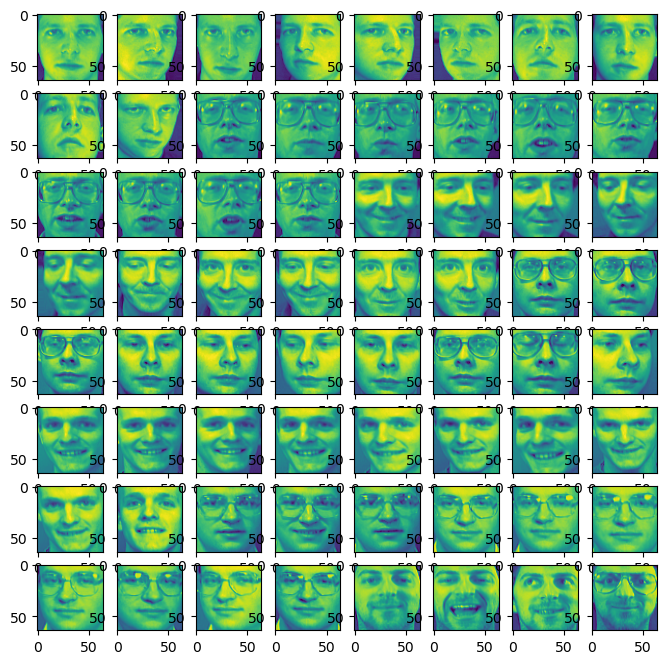

In [30]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(oliv.images[i])
plt.show()

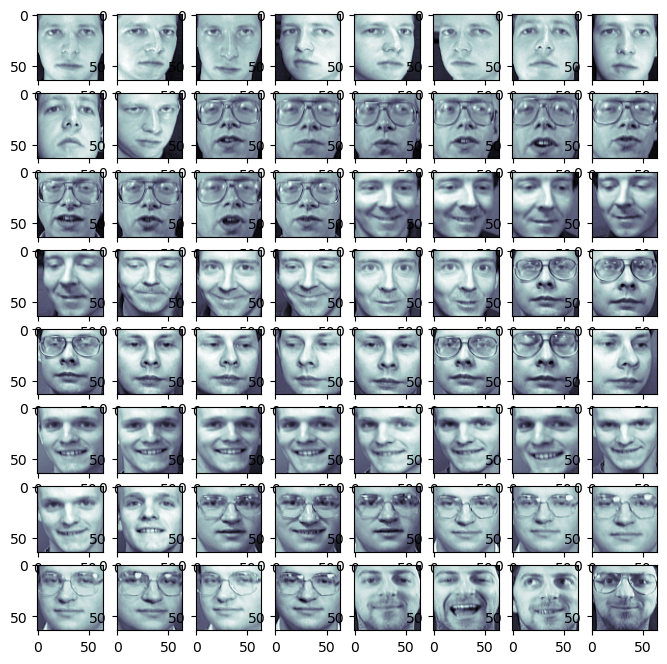

In [31]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(oliv.images[i] ,  cmap= plt.cm.bone )
plt.show()

In [14]:
x = oliv.data
y = oliv.target

In [15]:
pca = PCA()
pca.fit(x)

PCA()

In [16]:
pca.components_

array([[-0.00419152, -0.0071094 , -0.00933617, ...,  0.00018519,
         0.00337968,  0.00318828],
       [-0.02859162, -0.03328815, -0.03784624, ...,  0.02962782,
         0.02721298,  0.02488898],
       [ 0.00135657, -0.00032579, -0.00019783, ..., -0.01541375,
        -0.01370988, -0.01188349],
       ...,
       [ 0.00223391,  0.02056696,  0.01515807, ..., -0.01273603,
        -0.05849002, -0.07650293],
       [ 0.01714736,  0.02917704, -0.00942525, ...,  0.00159114,
         0.01249332, -0.00815306],
       [-0.00381911,  0.00621625,  0.01981988, ..., -0.01154262,
        -0.0165298 , -0.00565667]], dtype=float32)

In [17]:
pca.components_.shape

(400, 4096)

In [19]:
k = 0
total = sum(pca.explained_variance_)
currentSum = 0
while currentSum/total < 0.99:
    currentSum += pca.explained_variance_[k]
    k=k+1
k

260

In [20]:
k = 0
total = sum(pca.explained_variance_)
currentSum = 0
while currentSum/total < 0.95:
    currentSum += pca.explained_variance_[k]
    k=k+1
k

123

In [25]:
pca = PCA(n_components=k)
transformed_data = pca.fit_transform(x)
transformed_data.shape

(400, 123)

In [26]:
x_approx = pca.inverse_transform(transformed_data)
x_approx.shape

(400, 4096)

In [27]:
x_approx_images = x_approx.reshape((400,64,64))

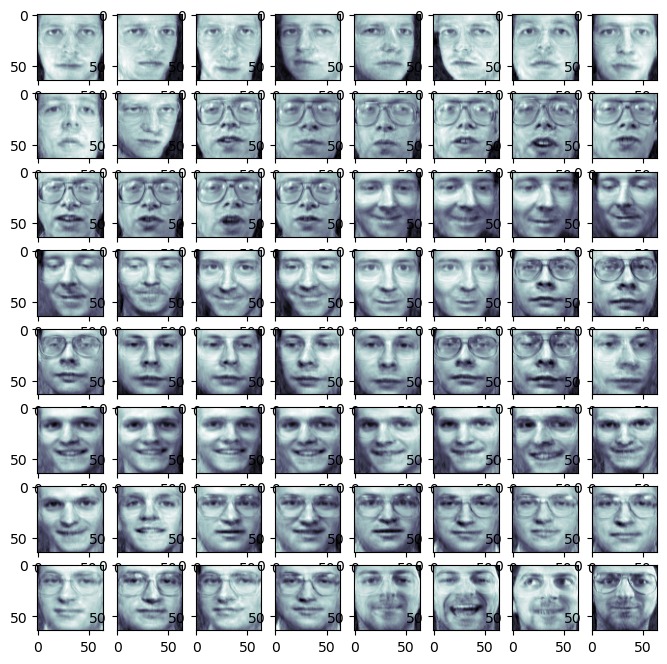

In [32]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(x_approx_images[i] ,  cmap= plt.cm.bone )
plt.show()

In [33]:
eigenv = pca.components_
eigenv.shape

(123, 4096)

In [35]:
eigenfaces = eigenv.reshape((123 , 64, 64))

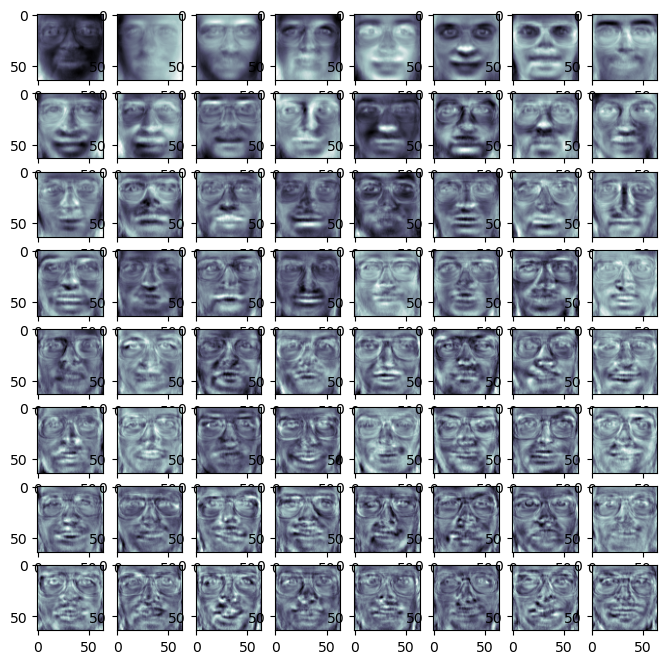

In [36]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(eigenfaces[i] ,  cmap= plt.cm.bone )
plt.show()